In [44]:

from PIL import Image
import glob, os
from os import listdir
from os.path import isfile, join
import numpy as np
from pandas import DataFrame
import pandas as pd
from matplotlib import pyplot as plt


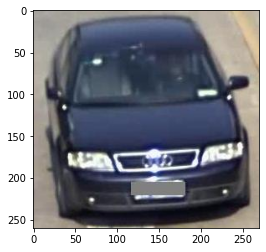

In [45]:
#este es el proceso que vamos a hacer con cada una de las fotos en la funcion posterior
img = Image.open("INPUT/prueba.jpg")

plt.imshow(img)

In [46]:
img.size

(270, 260)

In [47]:
size = (64,64)
car = img.resize(size)

In [48]:
car.size

(64, 64)

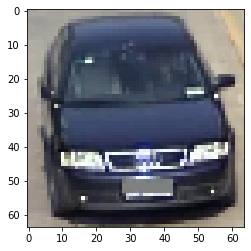

In [49]:
plt.imshow(car)

In [50]:
img2=Image.open("INPUT/black/prueba2.jpg")
##OJO he puesto las carpetas black, white red green en el repositorio pq no lo conseguia abrir desde otro sitio
# asi si funciona pero es una cutrada

In [51]:
#pruebas con la funcion de Antonio 

In [52]:
def resize_image(imagen,size,output=False):
    im = Image.open(imagen)
    rgb_image = RGBA_a_RGB(im)
    im_rgb = rgb_image.resize(size)
    
    if not output:
        return im_rgb 
    onlyfiles = [f for f in listdir(output) if isfile(join(output, f))]
    if image not in onlyfiles:
        im.save(output)
        return im_rgb
    else:
        print("file already exists, continuing to next one") 
        return im_rgb

In [53]:
def RGBA_a_RGB(image1):
    if image1.mode == "RGBA":
        background = Image.new("RGB", image1.size, (255, 255, 255))
        background.paste(image1, mask = image1.split()[3])
        background.save(f"{image1}", "JPEG", quality=100)
        rgb_image = Image.open(f"{image1}")
        return rgb_image
    return image1

In [54]:
def image_to_array(image):
    im_np= np.asarray(image)
    one_line=im_np.ravel()
    return one_line

In [55]:

####


paths={black:"INPUT/black/",
      white:"INPUT/white/",
      green:"INPUT/green/",
      red:"INPUT/red/"}
images={}
for color,path in paths.items():
    images[color]=[]
    for im in listdir(path):
        if im.endswith("jpg") or im.endswith("png"):
            a=resize_image(path+im,(64,64))
            images[clas].append(np.asarray(a))
    images[clas]=np.array(images[clas])
    
####   

NameError: name 'black' is not defined